In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('QVI_data.csv')
df

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream
264830,2370751,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium
264831,2370961,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget
264832,2370961,2018-10-27,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,OLD,OLDER FAMILIES,Budget


In [3]:
##Exploratory data analysis
# Examining transaction data

In [4]:
# checking information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


In [5]:
# changing the date to date formate


df['DATE'] = pd.to_datetime(df['DATE'])


In [6]:
# confirming the changes made in the date formate
type(df['DATE'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [7]:
# checking for missing values
df.isnull().sum().sort_values(ascending = False)

LYLTY_CARD_NBR      0
DATE                0
STORE_NBR           0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [8]:
df.describe()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE
count,2.648340e+05,264834,264834.000000,2.648340e+05,264834.000000,264834.000000,264834.000000,264834.000000
mean,1.355488e+05,2018-12-30 00:52:10.292937984,135.079423,1.351576e+05,56.583554,1.905813,7.299346,182.425512
min,1.000000e+03,2018-07-01 00:00:00,1.000000,1.000000e+00,1.000000,1.000000,1.500000,70.000000
25%,7.002100e+04,2018-09-30 00:00:00,70.000000,6.760050e+04,28.000000,2.000000,5.400000,150.000000
50%,1.303570e+05,2018-12-30 00:00:00,130.000000,1.351365e+05,56.000000,2.000000,7.400000,170.000000
75%,2.030940e+05,2019-03-31 00:00:00,203.000000,2.026998e+05,85.000000,2.000000,9.200000,175.000000
max,2.373711e+06,2019-06-30 00:00:00,272.000000,2.415841e+06,114.000000,5.000000,29.500000,380.000000
std,8.057990e+04,NaN,76.784063,7.813292e+04,32.826444,0.343436,2.527241,64.325148


In [9]:
# selecting control store from dataset


In [10]:
# Define the test store
test_store_nbr = 1

# Define similarity criteria
similarity_features = ['TOT_SALES', 'PROD_QTY', 'PACK_SIZE']


In [11]:
# Filter data for the test store
test_store_data = df[df['STORE_NBR'] == test_store_nbr][similarity_features]

In [12]:
from sklearn.metrics.pairwise import cosine_similarity

In [13]:
# Calculating similarity scores for all stores
similarity_scores = {}
for store_nbr, store_data in df.groupby('STORE_NBR'):
    if store_nbr != test_store_nbr:
        store_features = store_data[similarity_features]
        similarity_score = cosine_similarity(test_store_data, store_features)
        similarity_scores[store_nbr] = similarity_score[0][0]


In [14]:
control_store_nbrs = []
for store_nbr in [5, 2, 3]:
    if store_nbr in similarity_scores:
        control_store_nbrs.append(store_nbr)
    else:
        print(f"Store {store_nbr} not found in dataset.")
print("Selected control store numbers:", control_store_nbrs)


Selected control store numbers: [5, 2, 3]


In [15]:
#defineing metric for the control store
stores_of_interest = [5, 2, 3]
filtered_data = df[df['STORE_NBR'].isin(stores_of_interest)]



In [16]:
# Extracting the month and year from the 'DATE' column

filtered_data['Month_Year'] = filtered_data['DATE'].dt.to_period('M')

C:\Users\CHIKA ONWUKA\AppData\Local\Temp\ipykernel_2152\831336275.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Month_Year'] = filtered_data['DATE'].dt.to_period('M')


In [17]:
# Grouping the filtered data by store number and month-year combination, then sum the total sales

monthly_sales = filtered_data.groupby(['STORE_NBR', 'Month_Year'])['TOT_SALES'].sum().reset_index()
print(monthly_sales)

    STORE_NBR Month_Year  TOT_SALES
0           2    2018-07     150.80
1           2    2018-08     193.80
2           2    2018-09     154.40
3           2    2018-10     167.80
4           2    2018-11     162.90
5           2    2018-12     136.00
6           2    2019-01     162.80
7           2    2019-02     139.40
8           2    2019-03     192.10
9           2    2019-04     196.50
10          2    2019-05     192.70
11          2    2019-06     156.60
12          3    2018-07    1205.70
13          3    2018-08    1079.75
14          3    2018-09    1021.50
15          3    2018-10    1037.90
16          3    2018-11    1008.00
17          3    2018-12    1121.60
18          3    2019-01    1051.70
19          3    2019-02    1197.70
20          3    2019-03    1124.40
21          3    2019-04     920.00
22          3    2019-05     996.90
23          3    2019-06    1037.30
24          5    2018-07     812.00
25          5    2018-08     745.10
26          5    2018-09    

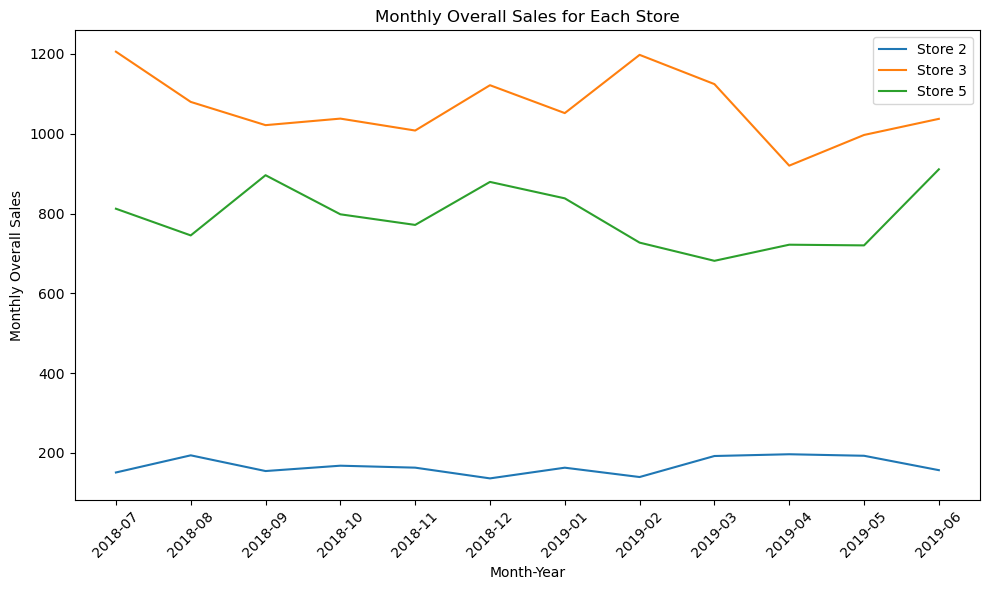

In [18]:
# ploting the graph
plt.figure(figsize=(10, 6))
for store_nbr in monthly_sales['STORE_NBR'].unique():
    store_data = monthly_sales[monthly_sales['STORE_NBR'] == store_nbr]
    plt.plot(store_data['Month_Year'].astype(str), store_data['TOT_SALES'], label=f'Store {store_nbr}')
    
plt.xlabel('Month-Year')
plt.ylabel('Monthly Overall Sales')
plt.title('Monthly Overall Sales for Each Store')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [19]:
#checking for revenue monthly number of customers 
stores_of_interest = [5, 2, 3]
filtered_data = df[df['STORE_NBR'].isin(stores_of_interest)]

In [20]:
filtered_data['Month_Year'] = filtered_data['DATE'].dt.to_period('M')


C:\Users\CHIKA ONWUKA\AppData\Local\Temp\ipykernel_2152\2375838231.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Month_Year'] = filtered_data['DATE'].dt.to_period('M')


In [21]:
monthly_customers = filtered_data.groupby(['STORE_NBR', 'Month_Year'])['LYLTY_CARD_NBR'].nunique().reset_index()
monthly_customers.rename(columns={'LYLTY_CARD_NBR': 'Num_Customers'}, inplace=True)

print(monthly_customers)

    STORE_NBR Month_Year  Num_Customers
0           2    2018-07             39
1           2    2018-08             39
2           2    2018-09             36
3           2    2018-10             41
4           2    2018-11             39
5           2    2018-12             35
6           2    2019-01             43
7           2    2019-02             29
8           2    2019-03             43
9           2    2019-04             47
10          2    2019-05             48
11          2    2019-06             40
12          3    2018-07            112
13          3    2018-08            112
14          3    2018-09            102
15          3    2018-10            104
16          3    2018-11            101
17          3    2018-12            111
18          3    2019-01            102
19          3    2019-02            116
20          3    2019-03            109
21          3    2019-04             90
22          3    2019-05            108
23          3    2019-06            105


In [22]:
monthly_revenue = filtered_data.groupby(['Month_Year', 'STORE_NBR'])['TOT_SALES'].sum().reset_index()
monthly_customers = filtered_data.groupby(['Month_Year', 'STORE_NBR'])['LYLTY_CARD_NBR'].nunique().reset_index()
monthly_customers.rename(columns={'LYLTY_CARD_NBR': 'Num_Customers'}, inplace=True)


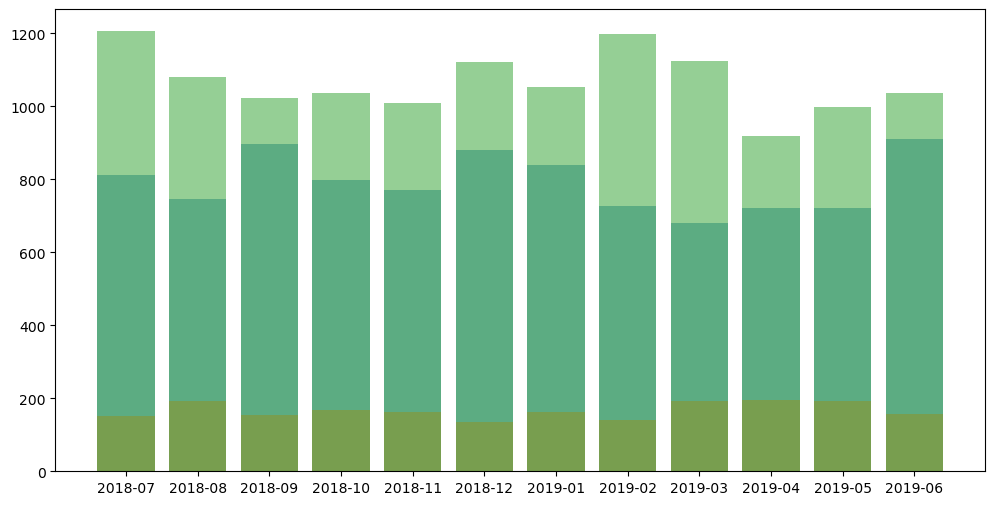

In [23]:
merged_data = pd.merge(monthly_revenue, monthly_customers, on=['Month_Year', 'STORE_NBR'])
#ploting the graph for revenue
plt.figure(figsize=(12, 6))
for store_nbr in stores_of_interest:
    store_data = merged_data[merged_data['STORE_NBR'] == store_nbr]
    plt.bar(store_data['Month_Year'].astype(str), store_data['TOT_SALES'], label=f'Store {store_nbr} Revenue', alpha=0.5)



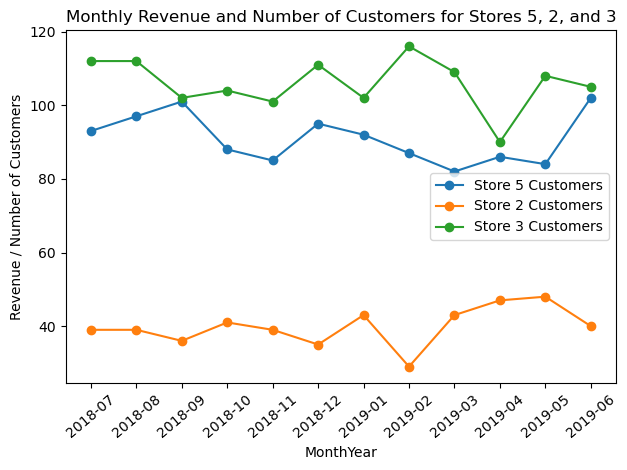

In [24]:
#plotting for number of customers
for store_nbr in stores_of_interest:
    store_data = merged_data[merged_data['STORE_NBR'] == store_nbr]
    plt.plot(store_data['Month_Year'].astype(str), store_data['Num_Customers'], label=f'Store {store_nbr} Customers', marker='o')
plt.xlabel('MonthYear')
plt.ylabel('Revenue / Number of Customers')
plt.title('Monthly Revenue and Number of Customers for Stores 5, 2, and 3')
plt.xticks(rotation=40)
plt.legend()
plt.tight_layout()
plt.show()

In [25]:
# checking for monthly number of transactions per customer
stores_of_interest = [5, 2, 3]
filtered_data = df[df['STORE_NBR'].isin(stores_of_interest)]


In [26]:
filtered_data['Month_Year'] = filtered_data['DATE'].dt.to_period('M')

C:\Users\CHIKA ONWUKA\AppData\Local\Temp\ipykernel_2152\817193781.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Month_Year'] = filtered_data['DATE'].dt.to_period('M')


In [27]:
transactions_per_customer = filtered_data.groupby(['Month_Year', 'STORE_NBR', 'LYLTY_CARD_NBR'])['TXN_ID'].count().reset_index()


In [28]:
monthly_avg_transactions_per_customer = transactions_per_customer.groupby(['Month_Year', 'STORE_NBR'])['TXN_ID'].mean().reset_index()
monthly_avg_transactions_per_customer.rename(columns={'TXN_ID': 'Avg_Transactions_per_Customer'}, inplace=True)


In [29]:
print(monthly_avg_transactions_per_customer)

   Month_Year  STORE_NBR  Avg_Transactions_per_Customer
0     2018-07          2                       1.051282
1     2018-07          3                       1.232143
2     2018-07          5                       1.290323
3     2018-08          2                       1.102564
4     2018-08          3                       1.196429
5     2018-08          5                       1.154639
6     2018-09          2                       1.027778
7     2018-09          3                       1.166667
8     2018-09          5                       1.237624
9     2018-10          2                       1.048780
10    2018-10          3                       1.144231
11    2018-10          5                       1.215909
12    2018-11          2                       1.025641
13    2018-11          3                       1.168317
14    2018-11          5                       1.305882
15    2018-12          2                       1.085714
16    2018-12          3                       1

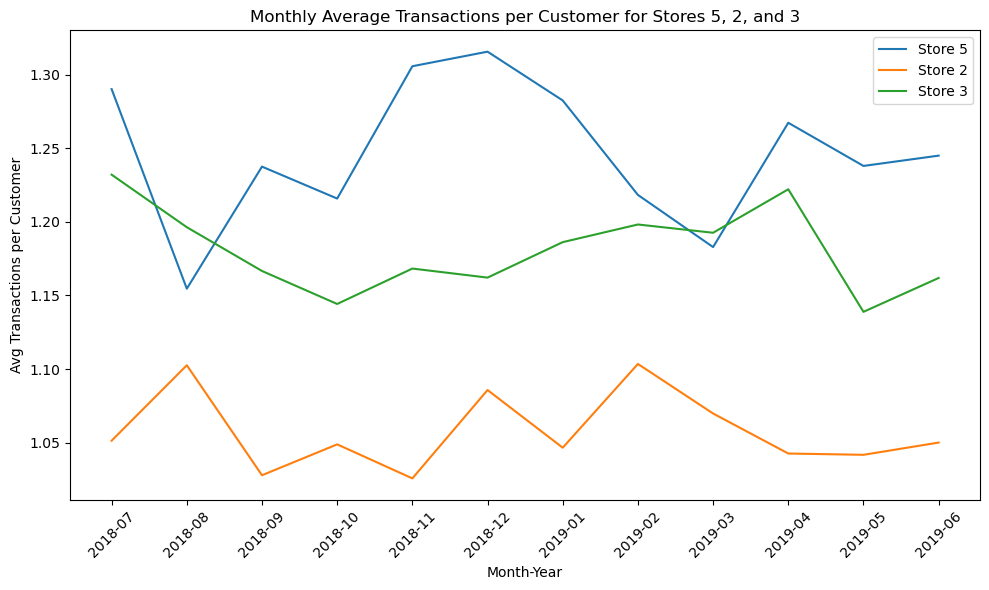

In [30]:
plt.figure(figsize=(10, 6))
for store_nbr in stores_of_interest:
    store_data = monthly_avg_transactions_per_customer[monthly_avg_transactions_per_customer['STORE_NBR'] == store_nbr]
    plt.plot(store_data['Month_Year'].astype(str), store_data['Avg_Transactions_per_Customer'], label=f'Store {store_nbr}')
plt.xlabel('Month-Year')
plt.ylabel('Avg Transactions per Customer')
plt.title('Monthly Average Transactions per Customer for Stores 5, 2, and 3')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [31]:
# checking for monthly stores_of_interest = [5, 2, 3]
filtered_data = df[df['STORE_NBR'].isin(stores_of_interest)]


In [32]:
filtered_data['Month_Year'] = filtered_data['DATE'].dt.to_period('M')


C:\Users\CHIKA ONWUKA\AppData\Local\Temp\ipykernel_2152\2375838231.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Month_Year'] = filtered_data['DATE'].dt.to_period('M')


In [33]:
filtered_data['Total_Sales'] = filtered_data['TOT_SALES'] * filtered_data['PROD_QTY']


C:\Users\CHIKA ONWUKA\AppData\Local\Temp\ipykernel_2152\4147711511.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Total_Sales'] = filtered_data['TOT_SALES'] * filtered_data['PROD_QTY']


In [34]:
monthly_sales = filtered_data.groupby(['Month_Year', 'STORE_NBR'])['Total_Sales'].sum().reset_index()


In [35]:
monthly_profit = monthly_sales.rename(columns={'Total_Sales': 'Profit'})

print(monthly_profit)

   Month_Year  STORE_NBR   Profit
0     2018-07          2   186.80
1     2018-07          3  2388.50
2     2018-07          5  1624.00
3     2018-08          2   319.70
4     2018-08          3  2145.55
5     2018-08          5  1516.30
6     2018-09          2   187.40
7     2018-09          3  2018.70
8     2018-09          5  1792.00
9     2018-10          2   188.80
10    2018-10          3  2062.50
11    2018-10          5  1596.00
12    2018-11          2   203.10
13    2018-11          3  1978.40
14    2018-11          5  1542.80
15    2018-12          2   153.60
16    2018-12          3  2230.60
17    2018-12          5  1758.40
18    2019-01          2   193.80
19    2019-01          3  2078.50
20    2019-01          5  1676.00
21    2019-02          2   178.60
22    2019-02          3  2366.70
23    2019-02          5  1454.00
24    2019-03          2   228.90
25    2019-03          3  2227.00
26    2019-03          5  1362.80
27    2019-04          2   240.90
28    2019-04 

In [36]:
#checking trial store


In [37]:
#definding trial store
trial_stores = [77, 86, 88]


In [38]:
# Define similarity criteria
similarity_features = ['TOT_SALES', 'PROD_QTY', 'PACK_SIZE']

In [39]:
# Function to calculate similarity score

def calculate_similarity(trial_store_nbr, control_store_nbr):
    trial_store_data = df[df['STORE_NBR'] == trial_store_nbr][similarity_features]
    control_store_data = df[df['STORE_NBR'] == control_store_nbr][similarity_features]
    return trial_store_data.corrwith(control_store_data, axis=1).mean()


In [40]:
# Dictionary to store control stores for each trial store
control_stores = {}

In [41]:
# Calculate control stores for each trial store
for trial_store_nbr in trial_stores:
    similarity_scores = {}
    for store_nbr in df['STORE_NBR'].unique():
        if store_nbr not in trial_stores:
            similarity_scores[store_nbr] = calculate_similarity(trial_store_nbr, store_nbr)
    control_store_nbr = max(similarity_scores, key=similarity_scores.get)
    control_stores[trial_store_nbr] = control_store_nbr


In [42]:
# Plotting the data for each trial store and its control store
for trial_store_nbr, control_store_nbr in control_stores.items():
     trial_store_data = df[df['STORE_NBR'] == trial_store_nbr]
control_store_data = df[df['STORE_NBR'] == control_store_nbr]

In [43]:
trial_monthly_revenue = trial_store_data.groupby(trial_store_data['DATE'].dt.to_period('M'))['TOT_SALES'].sum()
trial_monthly_customers = trial_store_data.groupby(trial_store_data['DATE'].dt.to_period('M'))['LYLTY_CARD_NBR'].nunique()
control_monthly_revenue = control_store_data.groupby(control_store_data['DATE'].dt.to_period('M'))['TOT_SALES'].sum()
control_monthly_customers = control_store_data.groupby(control_store_data['DATE'].dt.to_period('M'))['LYLTY_CARD_NBR'].nunique()

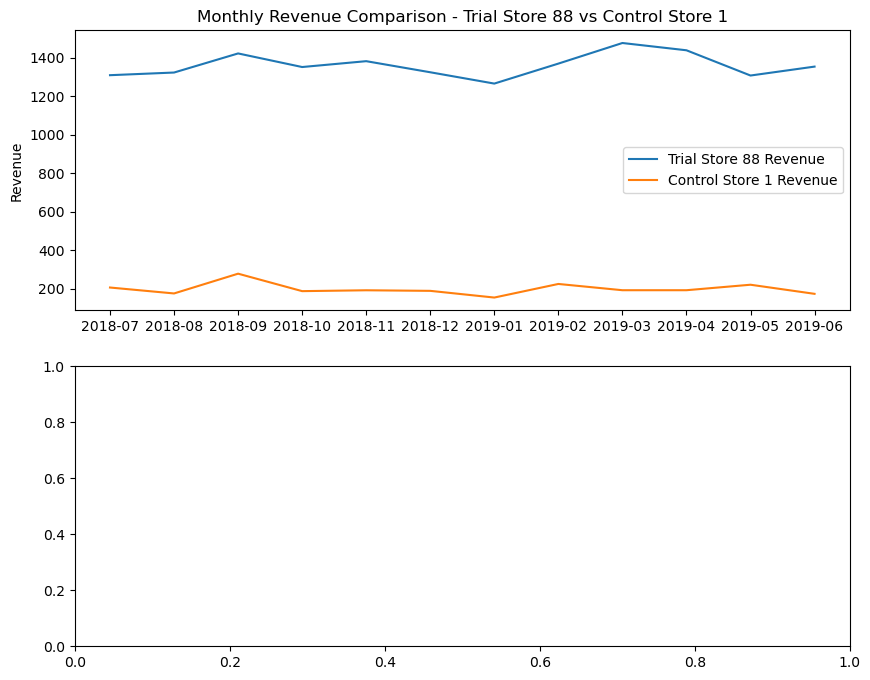

In [44]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

axes[0].plot(trial_monthly_revenue.index.astype(str), trial_monthly_revenue, label=f'Trial Store {trial_store_nbr} Revenue')
axes[0].plot(control_monthly_revenue.index.astype(str), control_monthly_revenue, label=f'Control Store {control_store_nbr} Revenue')
axes[0].set_ylabel('Revenue')
axes[0].set_title(f'Monthly Revenue Comparison - Trial Store {trial_store_nbr} vs Control Store {control_store_nbr}')
axes[0].legend()


In [45]:
trial_store_nbr = 86
control_store_nbr = 5


In [46]:
trial_store_data = df[df['STORE_NBR'] == trial_store_nbr]
control_store_data = df[df['STORE_NBR'] == control_store_nbr]


In [47]:
trial_monthly_revenue = trial_store_data.groupby(trial_store_data['DATE'].dt.to_period('M'))['TOT_SALES'].sum()
control_monthly_revenue = control_store_data.groupby(control_store_data['DATE'].dt.to_period('M'))['TOT_SALES'].sum()

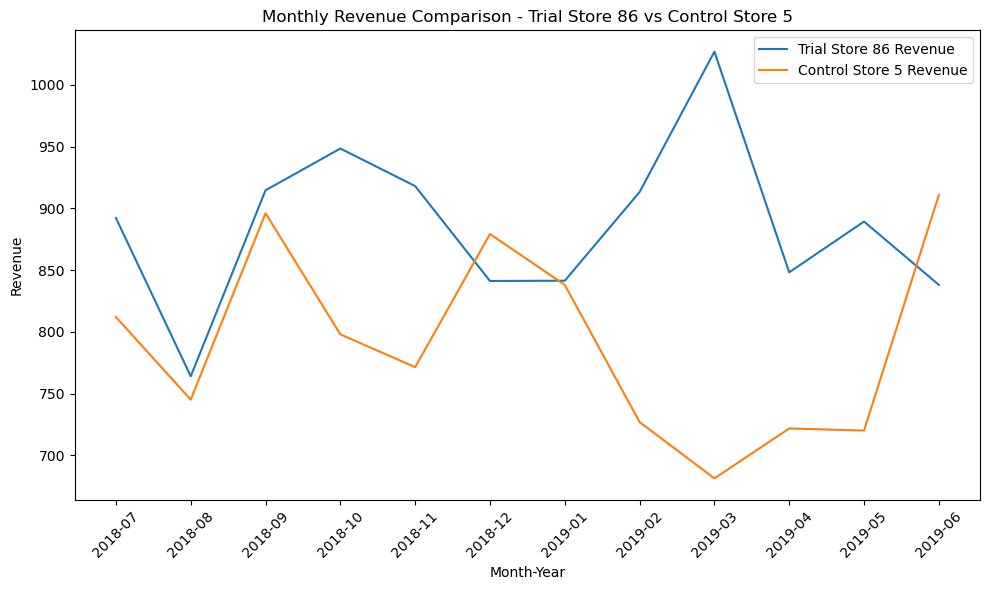

In [48]:
plt.figure(figsize=(10, 6))
plt.plot(trial_monthly_revenue.index.astype(str), trial_monthly_revenue, label=f'Trial Store {trial_store_nbr} Revenue')
plt.plot(control_monthly_revenue.index.astype(str), control_monthly_revenue, label=f'Control Store {control_store_nbr} Revenue')
plt.xlabel('Month-Year')
plt.ylabel('Revenue')
plt.title(f'Monthly Revenue Comparison - Trial Store {trial_store_nbr} vs Control Store {control_store_nbr}')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()




In [49]:
trial_store_nbr = 77
control_store_nbr = 3

In [50]:
trial_store_data = df[df['STORE_NBR'] == trial_store_nbr]
control_store_data = df[df['STORE_NBR'] == control_store_nbr]


In [51]:
trial_monthly_revenue = trial_store_data.groupby(trial_store_data['DATE'].dt.to_period('M'))['TOT_SALES'].sum()
control_monthly_revenue = control_store_data.groupby(control_store_data['DATE'].dt.to_period('M'))['TOT_SALES'].sum()


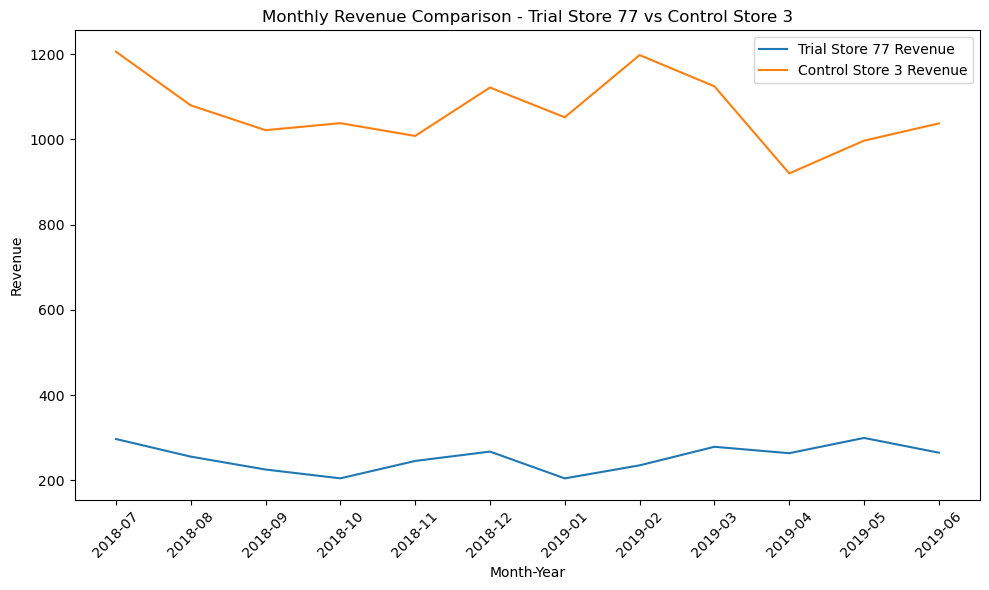

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(trial_monthly_revenue.index.astype(str), trial_monthly_revenue, label=f'Trial Store {trial_store_nbr} Revenue')
plt.plot(control_monthly_revenue.index.astype(str), control_monthly_revenue, label=f'Control Store {control_store_nbr} Revenue')
plt.xlabel('Month-Year')
plt.ylabel('Revenue')
plt.title(f'Monthly Revenue Comparison - Trial Store {trial_store_nbr} vs Control Store {control_store_nbr}')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [53]:
trial_store_nbr = 77
control_store_nbr = 3


In [54]:
trial_store_data = df[df['STORE_NBR'] == trial_store_nbr]
control_store_data = df[df['STORE_NBR'] == control_store_nbr]
trial_monthly_sales = trial_store_data.groupby(trial_store_data['DATE'].dt.to_period('M'))['TOT_SALES'].sum()
control_monthly_sales = control_store_data.groupby(control_store_data['DATE'].dt.to_period('M'))['TOT_SALES'].sum()



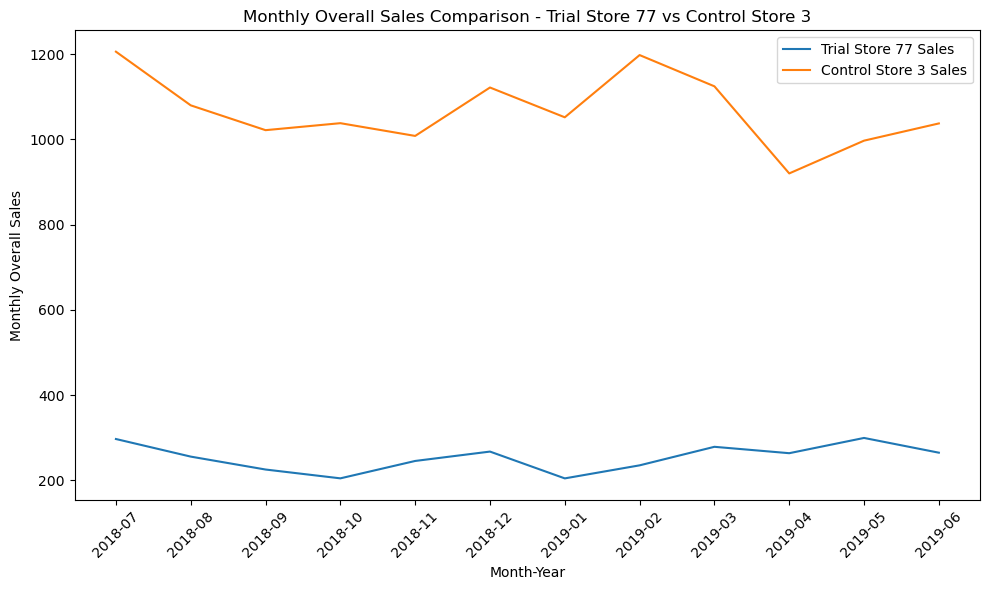

In [55]:
plt.figure(figsize=(10, 6))
plt.plot(trial_monthly_sales.index.astype(str), trial_monthly_sales, label=f'Trial Store {trial_store_nbr} Sales')
plt.plot(control_monthly_sales.index.astype(str), control_monthly_sales, label=f'Control Store {control_store_nbr} Sales')

plt.xlabel('Month-Year')
plt.ylabel('Monthly Overall Sales')
plt.title(f'Monthly Overall Sales Comparison - Trial Store {trial_store_nbr} vs Control Store {control_store_nbr}')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [56]:
trial_store_nbr = 88
control_store_nbr = 1


In [57]:
trial_store_data = df[df['STORE_NBR'] == trial_store_nbr]
control_store_data = df[df['STORE_NBR'] == control_store_nbr]
trial_monthly_sales = trial_store_data.groupby(trial_store_data['DATE'].dt.to_period('M'))['TOT_SALES'].sum()
control_monthly_sales = control_store_data.groupby(control_store_data['DATE'].dt.to_period('M'))['TOT_SALES'].sum()


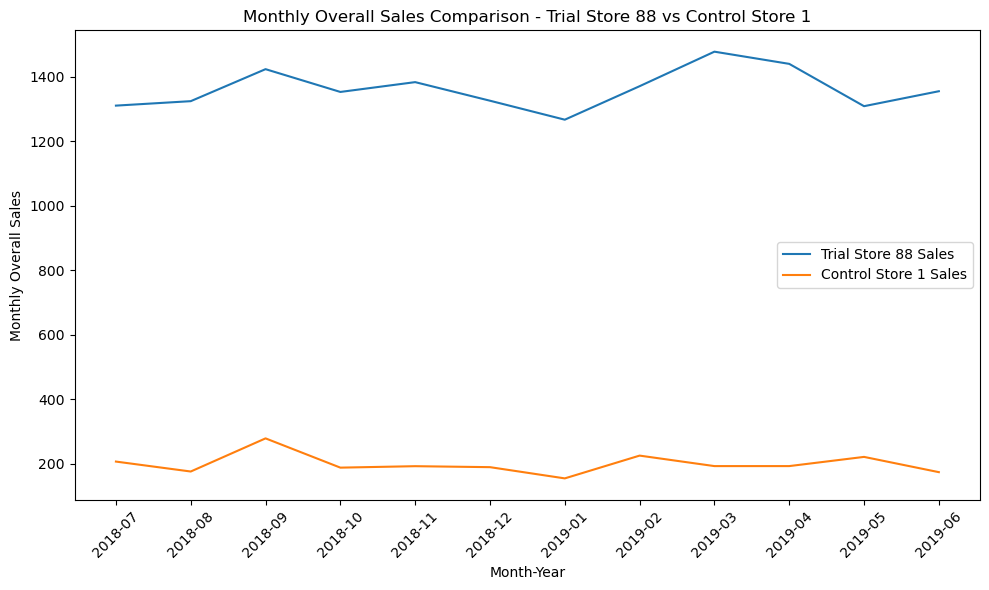

In [58]:
plt.figure(figsize=(10, 6))
plt.plot(trial_monthly_sales.index.astype(str), trial_monthly_sales, label=f'Trial Store {trial_store_nbr} Sales')
plt.plot(control_monthly_sales.index.astype(str), control_monthly_sales, label=f'Control Store {control_store_nbr} Sales')

plt.xlabel('Month-Year')
plt.ylabel('Monthly Overall Sales')
plt.title(f'Monthly Overall Sales Comparison - Trial Store {trial_store_nbr} vs Control Store {control_store_nbr}')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [59]:
trial_store_nbr = 86
control_store_nbr = 5

In [60]:
trial_store_data = df[df['STORE_NBR'] == trial_store_nbr]
control_store_data = df[df['STORE_NBR'] == control_store_nbr]
trial_monthly_sales = trial_store_data.groupby(trial_store_data['DATE'].dt.to_period('M'))['TOT_SALES'].sum()
control_monthly_sales = control_store_data.groupby(control_store_data['DATE'].dt.to_period('M'))['TOT_SALES'].sum()


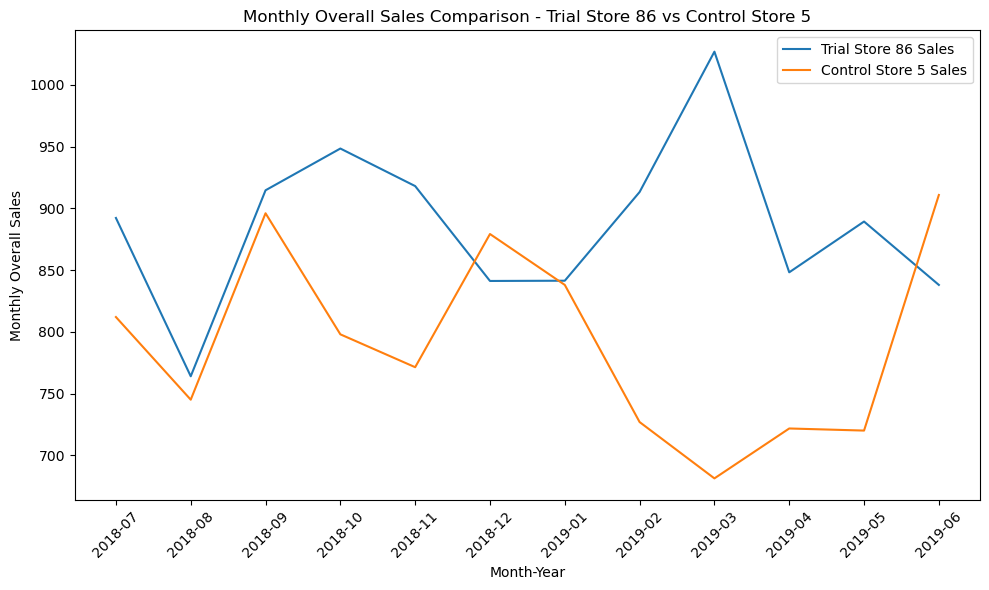

In [61]:
plt.figure(figsize=(10, 6))


plt.plot(trial_monthly_sales.index.astype(str), trial_monthly_sales, label=f'Trial Store {trial_store_nbr} Sales')
plt.plot(control_monthly_sales.index.astype(str), control_monthly_sales, label=f'Control Store {control_store_nbr} Sales')

plt.xlabel('Month-Year')
plt.ylabel('Monthly Overall Sales')
plt.title(f'Monthly Overall Sales Comparison - Trial Store {trial_store_nbr} vs Control Store {control_store_nbr}')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [62]:
trial_store_nbr = 77
control_store_nbr = 3


In [63]:
trial_store_data = df[df['STORE_NBR'] == trial_store_nbr]
control_store_data = df[df['STORE_NBR'] == control_store_nbr]
trial_transactions_per_customer = trial_store_data.groupby(trial_store_data['DATE'].dt.to_period('M')).apply(lambda x: x['TXN_ID'].nunique() / x['LYLTY_CARD_NBR'].nunique())
control_transactions_per_customer = control_store_data.groupby(control_store_data['DATE'].dt.to_period('M')).apply(lambda x: x['TXN_ID'].nunique() / x['LYLTY_CARD_NBR'].nunique())


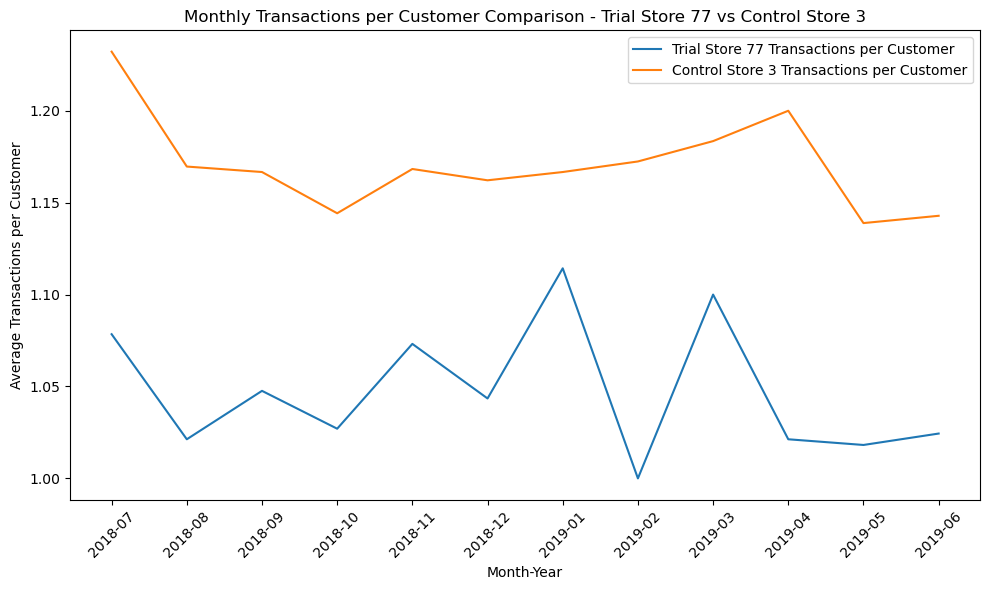

In [64]:
plt.figure(figsize=(10, 6))

plt.plot(trial_transactions_per_customer.index.astype(str), trial_transactions_per_customer, label=f'Trial Store {trial_store_nbr} Transactions per Customer')
plt.plot(control_transactions_per_customer.index.astype(str), control_transactions_per_customer, label=f'Control Store {control_store_nbr} Transactions per Customer')

plt.xlabel('Month-Year')
plt.ylabel('Average Transactions per Customer')
plt.title(f'Monthly Transactions per Customer Comparison - Trial Store {trial_store_nbr} vs Control Store {control_store_nbr}')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [65]:
trial_store_nbr = 88
control_store_nbr = 1

trial_store_data = df[df['STORE_NBR'] == trial_store_nbr]
control_store_data = df[df['STORE_NBR'] == control_store_nbr]
trial_transactions_per_customer = trial_store_data.groupby(trial_store_data['DATE'].dt.to_period('M')).apply(lambda x: x['TXN_ID'].nunique() / x['LYLTY_CARD_NBR'].nunique())
control_transactions_per_customer = control_store_data.groupby(control_store_data['DATE'].dt.to_period('M')).apply(lambda x: x['TXN_ID'].nunique() / x['LYLTY_CARD_NBR'].nunique())

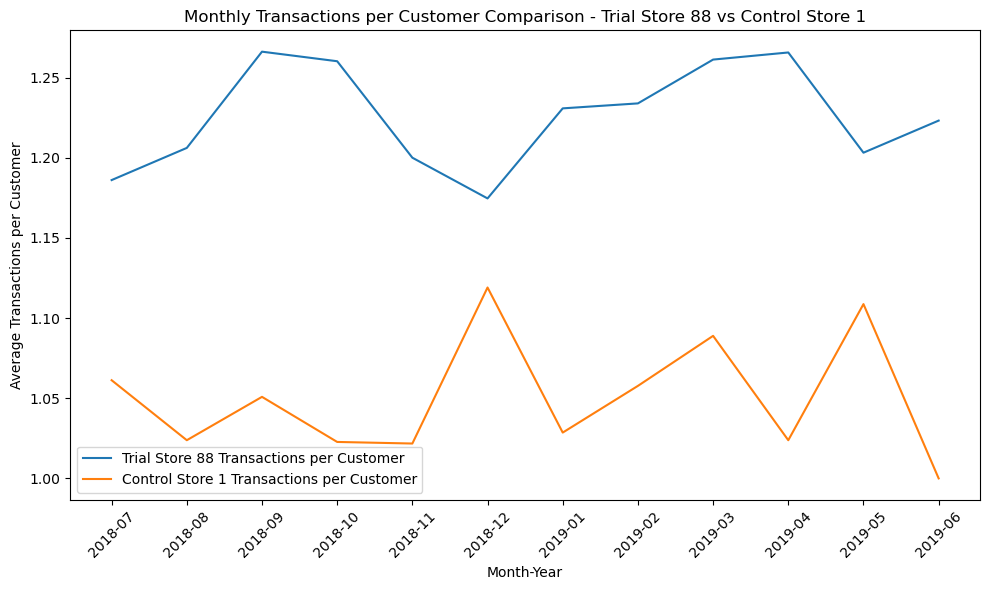

In [66]:
plt.figure(figsize=(10, 6))

plt.plot(trial_transactions_per_customer.index.astype(str), trial_transactions_per_customer, label=f'Trial Store {trial_store_nbr} Transactions per Customer')

plt.plot(control_transactions_per_customer.index.astype(str), control_transactions_per_customer, label=f'Control Store {control_store_nbr} Transactions per Customer')

plt.xlabel('Month-Year')
plt.ylabel('Average Transactions per Customer')
plt.title(f'Monthly Transactions per Customer Comparison - Trial Store {trial_store_nbr} vs Control Store {control_store_nbr}')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [67]:
trial_store_nbr = 86
control_store_nbr = 5
trial_store_data = df[df['STORE_NBR'] == trial_store_nbr]
control_store_data = df[df['STORE_NBR'] == control_store_nbr]
trial_transactions_per_customer = trial_store_data.groupby(trial_store_data['DATE'].dt.to_period('M')).apply(lambda x: x['TXN_ID'].nunique() / x['LYLTY_CARD_NBR'].nunique())
control_transactions_per_customer = control_store_data.groupby(control_store_data['DATE'].dt.to_period('M')).apply(lambda x: x['TXN_ID'].nunique() / x['LYLTY_CARD_NBR'].nunique())


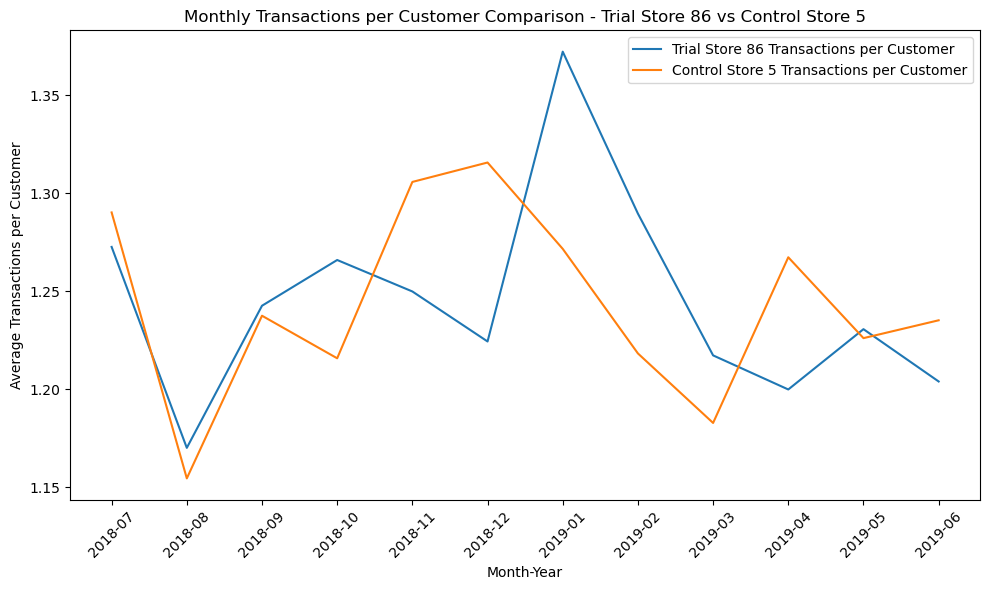

In [68]:
# Plotting the data
plt.figure(figsize=(10, 6))

plt.plot(trial_transactions_per_customer.index.astype(str), trial_transactions_per_customer, label=f'Trial Store {trial_store_nbr} Transactions per Customer')

plt.plot(control_transactions_per_customer.index.astype(str), control_transactions_per_customer, label=f'Control Store {control_store_nbr} Transactions per Customer')

plt.xlabel('Month-Year')
plt.ylabel('Average Transactions per Customer')
plt.title(f'Monthly Transactions per Customer Comparison - Trial Store {trial_store_nbr} vs Control Store {control_store_nbr}')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
## Summary
## monthly overall sales
## Trial store 86 and 88 consistenly outperform control store 5 and 1 in terms of monthly
## i think these trial store strategies are more effective in driving sales. while contr
## outperform trial store 77.
## Monthly number of transaction per customer
## trail store 86 and 88 have a average number of transaction per customer compared to c
## while control store 3 have a average number of transaction per customer compared to t
## it suggest better customer engagement and loyalty at the trial store and control stor
## monthly revenue
## since trial store 88 and 86 are generate more monthly revenue than control store 5 an
## revenue strategy is very effective same for control store 3
## Recommendation
## based on the analysis i recommend implementing strategies from trial store 88, 86 and
## like improving customer service to drive sales and revenue
## implementing effective marketing campaigns